## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [1]:
## Your code here

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nx = 30 
ny = 30

T = np.zeros((ny,nx))

T_list = []

# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

dx, dy = 1., 1.

steps = 1000

time = 0.0

for i in range (1,steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt
    
    T_list.append(T)

    T = T + dt*divT
    
    #compare current timestep with next timestep - change in solution should be become smaller and smaller
    
    #a data structure that will store both current and previous time step - lists???


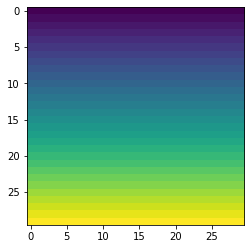

In [2]:
plt.imshow(T)

In [3]:
#print(T_list) - to check stored T - can't do this if too many time steps or it will crash


In [4]:
#indexing e.g. take -1 (last entry) and -2 (second last entry) and compare them

T_list[-1] - T_list[-2]


array([[1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898,
        1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898,
        1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898,
        1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898,
        1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898,
        1.10536898, 1.10536898, 1.10536898, 1.10536898, 1.10536898],
       [1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157,
        1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157,
        1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157,
        1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157,
        1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157,
        1.26495157, 1.26495157, 1.26495157, 1.26495157, 1.26495157],
       [1.41805443, 1.41805443, 1.41805443, 1.41805443, 1.41805443,
        1.41805443, 1.41805443, 1.41805443, 1.41805443, 1.41805443,
        1.41805443, 1.41805443, 1.41805443, 1.

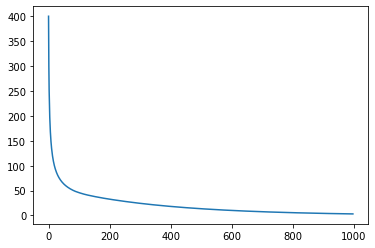

In [5]:
#Calculating the difference across all timesteps to try and find where convergence happens (i.e. where that difference becomes very small / negligible)

T_list = np.array(T_list)
T_diff = T_list [1:,:,:] - T_list[0:-1,:,: ]
T_diff_reduced = np.abs(T_diff).max(axis=(1,2))

#plot T_diff_reduced and see how / where it converges - the line should become pretty flat towards a steady state as the solution isn't changing much after each subsequent time step

plt.plot(T_diff_reduced)

In [10]:
#It appears to be converging towards a steady state after around 800 time steps 


#find maximum difference at 800 time steps??
T_diff = T_list[801,:,:] - T_list[800,:,:]

np.max(T_diff)


5.618837997844821

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [11]:
## Your test code here

nx = 30 
ny = 30

T = np.zeros((ny,nx))

# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

dx, dy = 1., 1.

steps = 100

time = 0.0

#Try different dt values to see where time step becomes too large
for i in range (1,steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 2

    T = T + dt*divT
    
    
T2 = np.zeros((ny,nx))
T2[0,:] = 300.
T2[-1,:] = 800.

for i in range (1,steps):
    gradT2x, gradT2y = np.gradient(T2, dx, dy)
    flux_x = k*gradT2x
    flux_y = k*gradT2y

    gradT2xx, gradT2xy = np.gradient(flux_x, dx, dy)
    gradT2yx, gradT2yy = np.gradient(flux_y, dx, dy)

    divT2 = gradT2xx + gradT2yy
    dt = 2.1

    T2 = T2 + dt*divT2


Text(0.5, 1.0, 'dt = 2.1 (100 steps)')

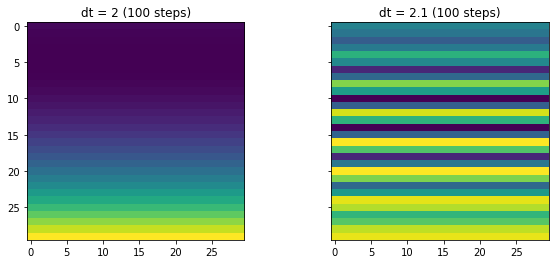

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('dt = 2 (100 steps)')
ax2.imshow(T2)
ax2.set_title('dt = 2.1 (100 steps)')

In [13]:
#Starts breaking down somewehere between 2 and 2.1 (starts osciallting between 2.05 and 2.08?) 
#2.1 is quite clearly oscillating whilst 2 is a nice gradient 

In [14]:
#try for values between 1 and 0 for where timestep becomes too small and gradient is lost 
nx = 30 
ny = 30

T = np.zeros((ny,nx))

# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

dx, dy = 1., 1.

steps = 100

time = 0.0

for i in range (1,steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 1

    T = T + dt*divT
    
T2 = np.zeros((ny,nx))
T2[0,:] = 300.
T2[-1,:] = 800.

for i in range (1,steps):
    gradT2x, gradT2y = np.gradient(T2, dx, dy)
    flux_x = k*gradT2x
    flux_y = k*gradT2y

    gradT2xx, gradT2xy = np.gradient(flux_x, dx, dy)
    gradT2yx, gradT2yy = np.gradient(flux_y, dx, dy)

    divT2 = gradT2xx + gradT2yy
    dt = 0.1

    T2 = T2 + dt*divT2

T3 = np.zeros((ny,nx))
T3[0,:] = 300.
T3[-1,:] = 800.

for i in range (1,steps):
    gradT3x, gradT3y = np.gradient(T3, dx, dy)
    flux_x = k*gradT3x
    flux_y = k*gradT3y

    gradT3xx, gradT3xy = np.gradient(flux_x, dx, dy)
    gradT3yx, gradT3yy = np.gradient(flux_y, dx, dy)

    divT3 = gradT3xx + gradT3yy
    dt = 0.001

    T3 = T3 + dt*divT3

Text(0.5, 1.0, 'dt = 0.001 (100 steps)')

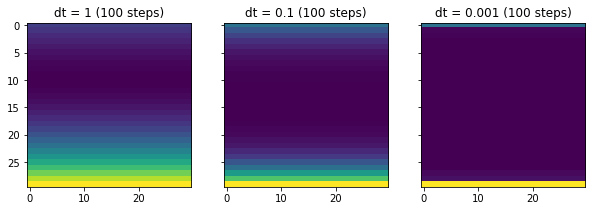

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('dt = 1 (100 steps)')
ax2.imshow(T2)
ax2.set_title('dt = 0.1 (100 steps)')
ax3.imshow(T3)
ax3.set_title('dt = 0.001 (100 steps)')

In [16]:
#loses the gradient somewhere between 0.1 and 0? 
#With only 100 timesteps a timestep size that is quite small/ approaching zero is not enough to create a gradient / solution

In [24]:
#calculate dt based on mesh and diffusivity 

dx, dy = 1., 1.
k = 1.0
dt = (dx*dy)/k

print ("dt =", dt)


dt = 1.0


Text(0.5, 1.0, 'dt = 0.9 (100 steps)')

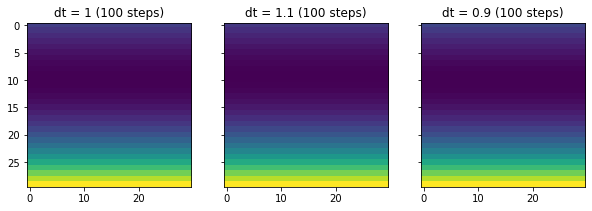

In [25]:
#Increase/decrease "optimal" timestep size by small amount (is 0.1 a small enough amount?)
#Testing for dt = 1, dt = 1.1 and dt = 0.9? 

nx = 30 
ny = 30

T = np.zeros((ny,nx))

# Initial conditions
T[0,:] = 300.
T[-1,:] = 800.

k = 1.0

dx, dy = 1., 1.

steps = 100

time = 0.0

for i in range (1,steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k

    T = T + dt*divT
    
T2 = np.zeros((ny,nx))
T2[0,:] = 300.
T2[-1,:] = 800.

for i in range (1,steps):
    gradT2x, gradT2y = np.gradient(T2, dx, dy)
    flux_x = k*gradT2x
    flux_y = k*gradT2y

    gradT2xx, gradT2xy = np.gradient(flux_x, dx, dy)
    gradT2yx, gradT2yy = np.gradient(flux_y, dx, dy)

    divT2 = gradT2xx + gradT2yy
    dt = 1.1

    T2 = T2 + dt*divT2

T3 = np.zeros((ny,nx))
T3[0,:] = 300.
T3[-1,:] = 800.

for i in range (1,steps):
    gradT3x, gradT3y = np.gradient(T3, dx, dy)
    flux_x = k*gradT3x
    flux_y = k*gradT3y

    gradT3xx, gradT3xy = np.gradient(flux_x, dx, dy)
    gradT3yx, gradT3yy = np.gradient(flux_y, dx, dy)

    divT3 = gradT3xx + gradT3yy
    dt = 0.9

    T3 = T3 + dt*divT3
    
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(10,4))
ax1.imshow(T)
ax1.set_title('dt = 1 (100 steps)')
ax2.imshow(T2)
ax2.set_title('dt = 1.1 (100 steps)')
ax3.imshow(T3)
ax3.set_title('dt = 0.9 (100 steps)')

In [ ]:
#Not a lot of difference between these three solutions - so dt seems to be pretty stable around 1? 